### Step 1:
Load the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd


In [4]:
df = pd.read_csv("Customer_Clustering_Data.csv")
df

,Age,Annual Income (k$),Spending Score (1-100),Savings Rate (%),Debt to Income Ratio,Credit Score,Loan Count
0,56,28,6,18.46,1.92,372,0
1,69,118,82,22.71,1.54,658,0
2,46,67,69,27.43,1.31,522,2
3,32,73,47,27.45,1.54,715,3
4,60,139,25,10.09,1.48,669,2
...,...,...,...,...,...,...,...
295,18,47,11,48.10,1.37,553,0
296,65,120,100,39.50,1.91,619,0
297,29,60,77,34.53,0.34,562,0
298,22,65,3,26.07,1.80,673,1


In [5]:
Final = df.copy()

####  Removing Unnecessary variable

In [ ]:
del trip_advi_df['User_ID']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     300 non-null    int64  
 1   Annual Income (k$)      300 non-null    int64  
 2   Spending Score (1-100)  300 non-null    int64  
 3   Savings Rate (%)        300 non-null    float64
 4   Debt to Income Ratio    300 non-null    float64
 5   Credit Score            300 non-null    int64  
 6   Loan Count              300 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 16.5 KB


In [7]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Savings Rate (%),Debt to Income Ratio,Credit Score,Loan Count
0,56,28,6,18.46,1.92,372,0
1,69,118,82,22.71,1.54,658,0
2,46,67,69,27.43,1.31,522,2
3,32,73,47,27.45,1.54,715,3
4,60,139,25,10.09,1.48,669,2


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [8]:
samples = df.values # get all row and columne with header
samples

array([[5.60e+01, 2.80e+01, 6.00e+00, ..., 1.92e+00, 3.72e+02, 0.00e+00],
       [6.90e+01, 1.18e+02, 8.20e+01, ..., 1.54e+00, 6.58e+02, 0.00e+00],
       [4.60e+01, 6.70e+01, 6.90e+01, ..., 1.31e+00, 5.22e+02, 2.00e+00],
       ...,
       [2.90e+01, 6.00e+01, 7.70e+01, ..., 3.40e-01, 5.62e+02, 0.00e+00],
       [2.20e+01, 6.50e+01, 3.00e+00, ..., 1.80e+00, 6.73e+02, 1.00e+00],
       [5.40e+01, 5.40e+01, 3.30e+01, ..., 1.23e+00, 4.66e+02, 1.00e+00]])

### Step 3: Elbow Method
1. Measure the quality of clusterings with different numbers of clusters using the inertia.

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [15]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


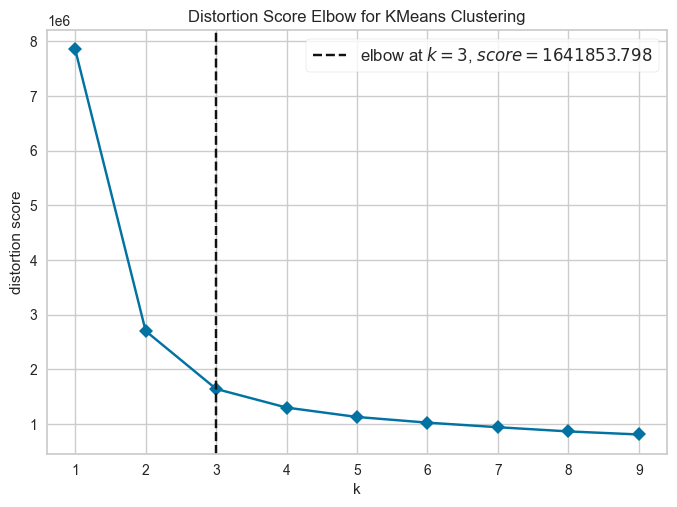

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10),timings=False)
visualizer.fit(samples)        # Fit the data to the visualizer
visualizer.show()

# Model or Algorithm

In [17]:
model2 = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [19]:
Final['Cluster_Made'] = model2.fit_predict(samples)
Final.head()

,Age,Annual Income (k$),Spending Score (1-100),Savings Rate (%),Debt to Income Ratio,Credit Score,Loan Count,Cluster_Made
0,56,28,6,18.46,1.92,372,0,2
1,69,118,82,22.71,1.54,658,0,0
2,46,67,69,27.43,1.31,522,2,0
3,32,73,47,27.45,1.54,715,3,1
4,60,139,25,10.09,1.48,669,2,0


In [20]:
Final.Cluster_Made = Final.Cluster_Made.replace([0,1,2],['First Group','Second Group','Third Group'])
Final.head()

,Age,Annual Income (k$),Spending Score (1-100),Savings Rate (%),Debt to Income Ratio,Credit Score,Loan Count,Cluster_Made
0,56,28,6,18.46,1.92,372,0,Third Group
1,69,118,82,22.71,1.54,658,0,First Group
2,46,67,69,27.43,1.31,522,2,First Group
3,32,73,47,27.45,1.54,715,3,Second Group
4,60,139,25,10.09,1.48,669,2,First Group


### Final Cluster Centorids

In [21]:
model2.cluster_centers_

array([[ 43.14529915,  88.11111111,  49.38461538,  26.99042735,
          1.00923077, 596.57264957,   2.        ],
       [ 42.43421053,  90.82894737,  53.69736842,  26.00065789,
          1.08578947, 762.06578947,   2.22368421],
       [ 44.14018692,  81.8317757 ,  48.77570093,  24.37448598,
          1.12439252, 393.85981308,   2.07476636]])

In [22]:
Final.Cluster_Made.value_counts(ascending=False)

Cluster_Made
First Group     117
Third Group     107
Second Group     76
Name: count, dtype: int64

# Finished